In [3]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as mtick

# Study data files
all_unemp_path = "Clean Data/all_unemp_clean.csv"
unemp_types_path = "Clean Data/Finalone.csv"

# Read the mouse data and the study results
all_unemp_df = pd.read_csv(all_unemp_path)
unemp_types_df = pd.read_csv(unemp_types_path)

# Combine the data into a single dataset
project1_table_raw = pd.merge(all_unemp_df, unemp_types_df, how="left")

# Display the data table for preview
project1_table_raw

,Month,Year,All Unemployment,Men (20+),Women (20+),White,Black or African American,Asian,Hispanic or Latino,Less than a High School Diploma (25+),High School Graduates No College (25+),Some College or Associate Degree (25+),Bachelor's Degree and Higher (25+)
0,Jan,2001,4.20,3.60,3.60,3.60,8.20,0.00,5.80,6.70,3.80,3.00,1.60
1,Feb,2001,4.20,3.70,3.70,3.70,7.70,0.00,6.10,7.50,3.70,2.80,1.60
2,Mar,2001,4.30,3.80,3.60,3.70,8.30,0.00,6.20,6.80,3.80,2.70,2.00
3,Apr,2001,4.40,3.90,3.70,3.90,8.00,0.00,6.40,6.80,3.70,2.90,2.10
4,May,2001,4.30,3.90,3.80,3.80,7.90,0.00,6.30,6.60,3.90,3.00,2.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,May,2021,5.80,5.90,5.40,5.10,9.10,5.50,7.30,9.10,6.80,5.90,3.20
245,Jun,2021,5.90,5.90,5.50,5.20,9.20,5.80,7.40,10.20,7.00,5.80,3.50
246,Jul,2021,5.40,5.40,5.00,4.80,8.20,5.30,6.60,9.50,6.30,5.00,3.10
247,Aug,2021,5.20,5.10,4.80,4.50,8.80,4.60,6.40,7.80,6.00,5.10,2.80


In [5]:
# Remove Month column and find average
project1_table_raw = project1_table_raw.drop(['Month'], axis=1)
project1_table_raw.head()

,Year,All Unemployment,Men (20+),Women (20+),White,Black or African American,Asian,Hispanic or Latino,Less than a High School Diploma (25+),High School Graduates No College (25+),Some College or Associate Degree (25+),Bachelor's Degree and Higher (25+)
0,2001,4.2,3.6,3.6,3.6,8.2,0.0,5.8,6.7,3.8,3.0,1.6
1,2001,4.2,3.7,3.7,3.7,7.7,0.0,6.1,7.5,3.7,2.8,1.6
2,2001,4.3,3.8,3.6,3.7,8.3,0.0,6.2,6.8,3.8,2.7,2.0
3,2001,4.4,3.9,3.7,3.9,8.0,0.0,6.4,6.8,3.7,2.9,2.1
4,2001,4.3,3.9,3.8,3.8,7.9,0.0,6.3,6.6,3.9,3.0,2.1


In [6]:
# Display the data table for preview
project1_table_year = project1_table_raw.groupby(['Year'],as_index=False).mean()
project1_table_year.head()

,Year,All Unemployment,Men (20+),Women (20+),White,Black or African American,Asian,Hispanic or Latino,Less than a High School Diploma (25+),High School Graduates No College (25+),Some College or Associate Degree (25+),Bachelor's Degree and Higher (25+)
0,2001,4.741667,4.216667,4.125000,4.166667,8.650000,0.000000,6.575000,7.241667,4.183333,3.300000,2.258333
1,2002,5.783333,5.300000,5.058333,5.100000,10.241667,0.000000,7.558333,8.433333,5.258333,4.533333,2.908333
2,2003,5.991667,5.650000,5.116667,5.250000,10.783333,5.983333,7.658333,8.791667,5.450000,4.791667,3.075000
3,2004,5.541667,5.041667,4.841667,4.800000,10.375000,4.416667,6.950000,8.508333,4.983333,4.233333,2.716667
4,2005,5.083333,4.416667,4.583333,4.366667,9.983333,3.975000,6.008333,7.625000,4.708333,3.866667,2.308333


In [7]:
# Find Average of each year
pd.options.display.float_format = '{:.2f}'.format
project1_table_year.head()

,Year,All Unemployment,Men (20+),Women (20+),White,Black or African American,Asian,Hispanic or Latino,Less than a High School Diploma (25+),High School Graduates No College (25+),Some College or Associate Degree (25+),Bachelor's Degree and Higher (25+)
0,2001,4.74,4.22,4.12,4.17,8.65,0.00,6.58,7.24,4.18,3.30,2.26
1,2002,5.78,5.30,5.06,5.10,10.24,0.00,7.56,8.43,5.26,4.53,2.91
2,2003,5.99,5.65,5.12,5.25,10.78,5.98,7.66,8.79,5.45,4.79,3.07
3,2004,5.54,5.04,4.84,4.80,10.38,4.42,6.95,8.51,4.98,4.23,2.72
4,2005,5.08,4.42,4.58,4.37,9.98,3.98,6.01,7.62,4.71,3.87,2.31


In [8]:
# project1_table_year.dtypes

In [9]:
project1_table_year['Year'] = pd.to_datetime(project1_table_year['Year'], format='%Y')

In [10]:
project1_table_year.dtypes

Year                                      datetime64[ns]
All Unemployment                                 float64
Men (20+)                                        float64
Women (20+)                                      float64
White                                            float64
Black or African American                        float64
Asian                                            float64
Hispanic or Latino                               float64
Less than a High School Diploma (25+)            float64
High School Graduates No College (25+)           float64
Some College or Associate Degree (25+)           float64
Bachelor's Degree and Higher (25+)               float64
dtype: object

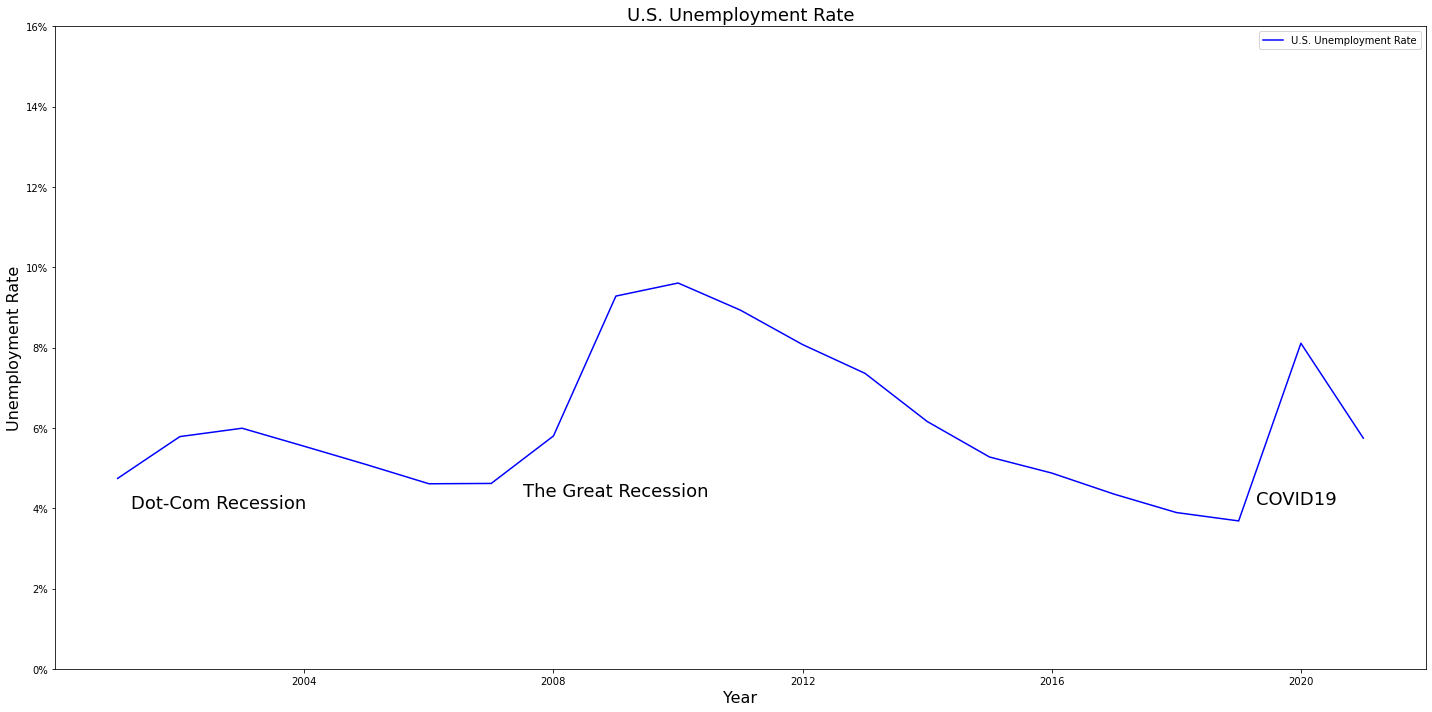

In [11]:
# Generate a line plot of All Unemployment vs. years
# line_plot_df = project1_table_year.loc[project1_table_year["All Unemployment"]]
# project1_table_year['Year'] = pd.to_datetime(project1_table_year['Year'], format='%Y')
# Collect the annual unemployment rates
plt.figure(figsize=(20,10))
x = project1_table_year['Year']
y = project1_table_year['All Unemployment']
line, = plt.plot(x, y, color="blue", label="U.S. Unemployment Rate")
plt.title('U.S. Unemployment Rate',fontsize=18)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Unemployment Rate',fontsize=16)
plt.legend(handles=[line],loc="best",fontsize=10)
plt.text(18000,4.1,"COVID19",fontsize= 18)
plt.text(11400,4,"Dot-Com Recession",fontsize= 18)
plt.text(13700,4.3,"The Great Recession",fontsize= 18)
plt.ylim(0,16,4)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

fmt = '%.0f%%' # Format for the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
plt.tight_layout()

# plt.show()

plt.savefig("Images/US Unemployment Rate")



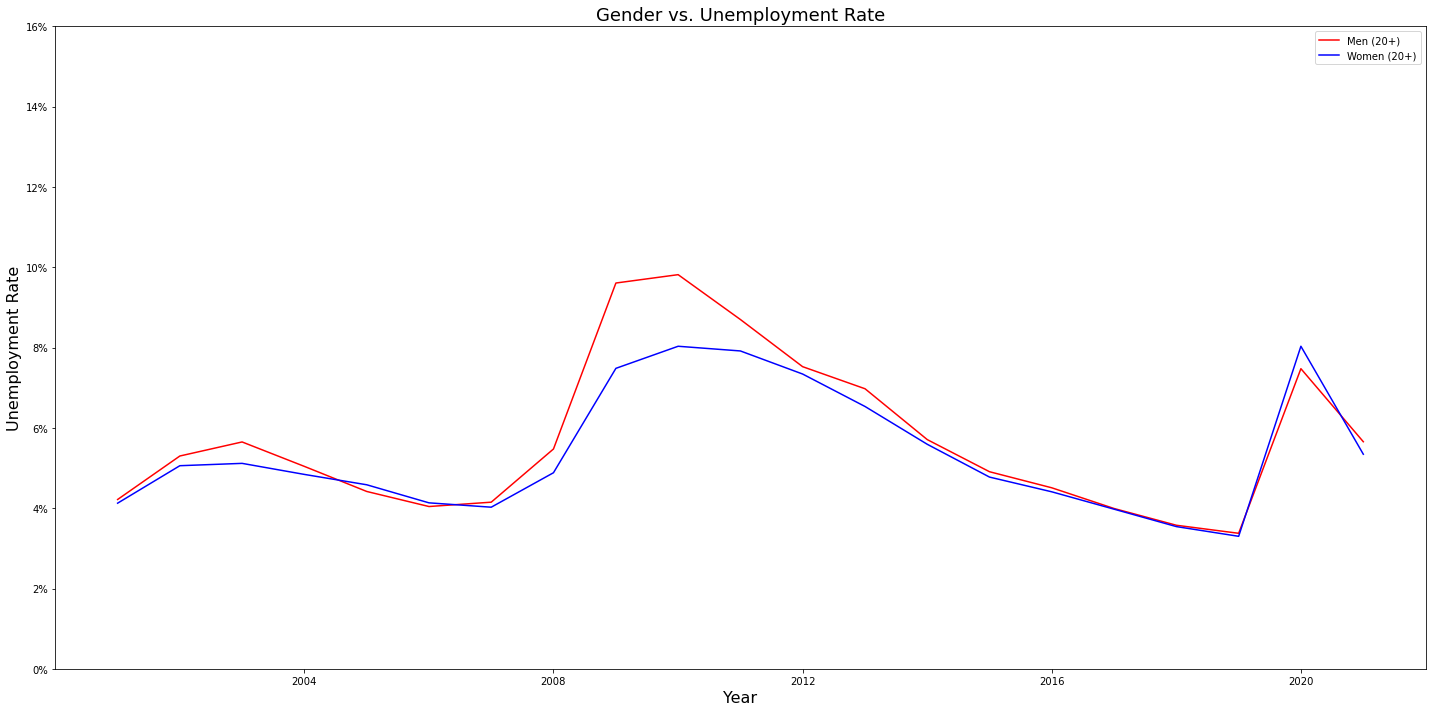

In [12]:

plt.figure(figsize=(20,10))
plt.plot( 'Year','Men (20+)', data=project1_table_year, color='red')
plt.plot( 'Year','Women (20+)', data=project1_table_year, color='blue')
plt.legend()
plt.title("Gender vs. Unemployment Rate",fontsize=18)
plt.xlabel("Year",fontsize=16)
plt.ylabel("Unemployment Rate",fontsize=16)

plt.ylim(0,16,4)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

fmt = '%.0f%%' # Format for the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
plt.tight_layout()

plt.savefig("Images/Gender vs Unemployment Rate")



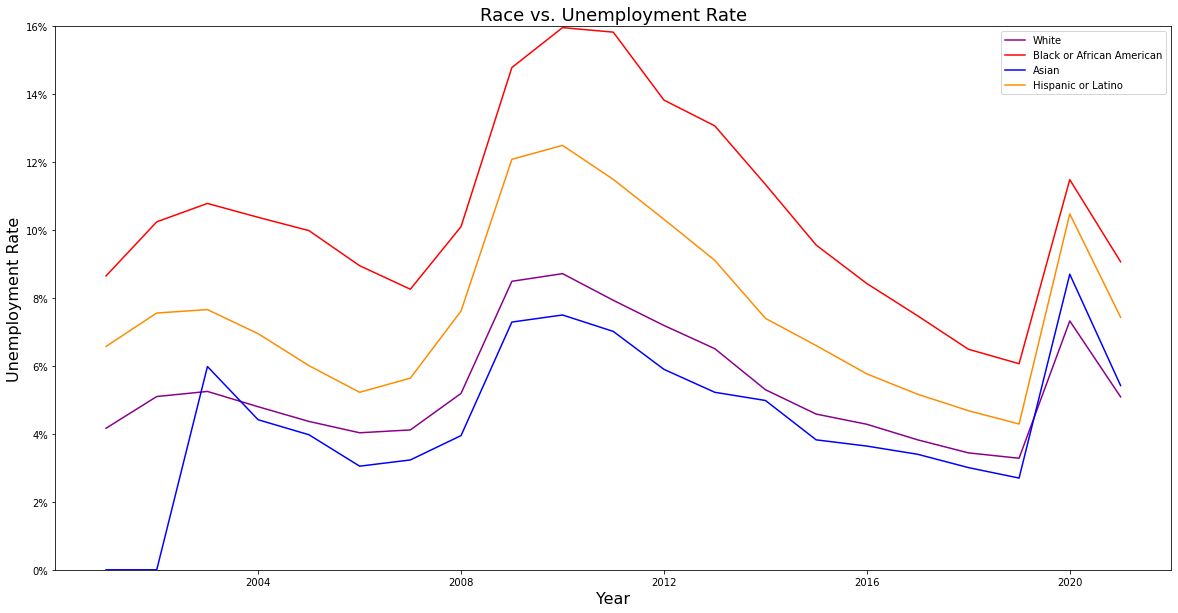

In [13]:
plt.figure(figsize=(20,10))
plt.plot( 'Year', 'White', data=project1_table_year, color='darkmagenta')
plt.plot( 'Year', 'Black or African American', data=project1_table_year, color='red')
plt.plot( 'Year', 'Asian', data=project1_table_year, color='blue')
plt.plot( 'Year', 'Hispanic or Latino', data=project1_table_year, color='darkorange')
plt.legend(loc='best')
plt.title("Race vs. Unemployment Rate",fontsize=18)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Unemployment Rate',fontsize=16)

plt.ylim(0,16,4)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

fmt = '%.0f%%' # Format for the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

plt.savefig("Images/Race vs Unemployment Rate")

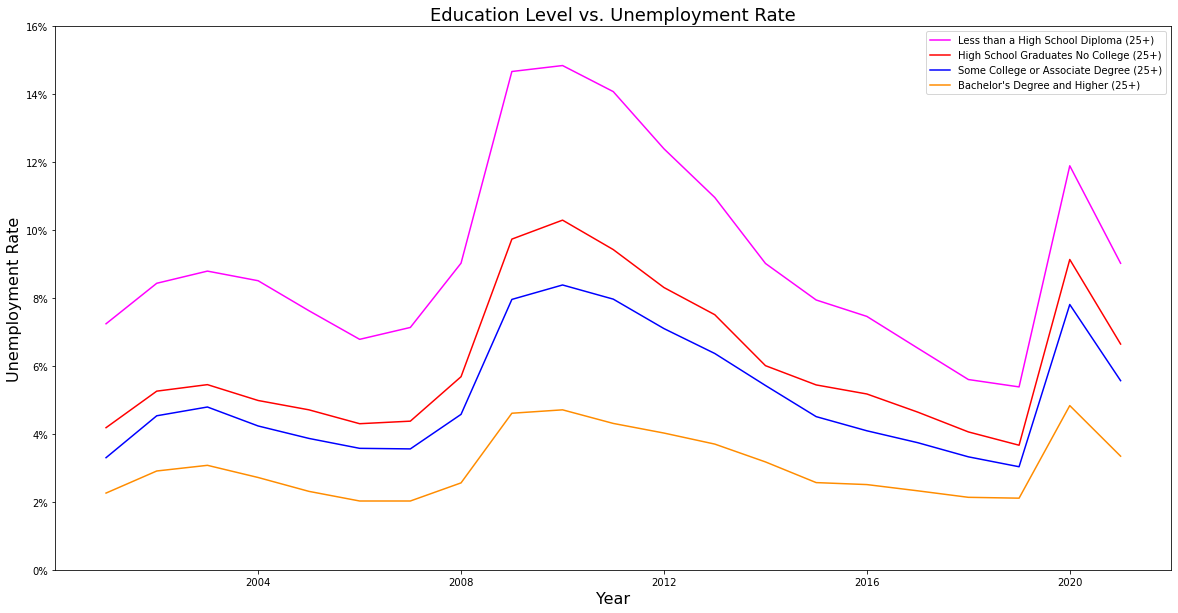

In [14]:
plt.figure(figsize=(20,10))
plt.plot( 'Year', 'Less than a High School Diploma (25+)', data=project1_table_year, color='magenta')
plt.plot( 'Year', 'High School Graduates No College (25+)', data=project1_table_year, color='red')
plt.plot( 'Year', 'Some College or Associate Degree (25+)', data=project1_table_year, color='blue')
plt.plot( 'Year', "Bachelor's Degree and Higher (25+)", data=project1_table_year, color='darkorange')
plt.legend(loc='best')
plt.title("Education Level vs. Unemployment Rate",fontsize=18)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Unemployment Rate',fontsize=16)

plt.ylim(0,16,4)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

fmt = '%.0f%%' # Format for the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

plt.savefig("Images/Education vs Unemployment Rate")

In [39]:
# Statistical Analysis
# create mean of table summing up all years from project1_table_year
# stat_table = project1_table_year["All Unemployment"].mean()
stat_table = project1_table_year.mean()
stat_table


All Unemployment                          6.07
Men (20+)                                 5.72
Women (20+)                               5.38
White                                     5.38
Black or African American                10.51
Asian                                     4.44
Hispanic or Latino                        7.64
Less than a High School Diploma (25+)     9.21
High School Graduates No College (25+)    6.14
Some College or Associate Degree (25+)    5.13
Bachelor's Degree and Higher (25+)        3.06
dtype: float64

In [73]:
# Chi Square test for Education

# create df of expected and observed
#create list of avgs for all variables
observed_ed = pd.Series([project1_table_year["Less than a High School Diploma (25+)"].mean(),
                         project1_table_year["High School Graduates No College (25+)"].mean(),
                         project1_table_year["Some College or Associate Degree (25+)"].mean(),
                         project1_table_year["Bachelor's Degree and Higher (25+)"].mean()],
                         index =["Less than a High School Diploma (25+)", "High School Graduates No College (25+)",
                                 "Some College or Associate Degree (25+)", "Bachelor's Degree and Higher (25+)"])


observed_ed_df = pd.DataFrame([observed_ed]).T

# put variables in expected
observed_ed_df[1]= 5.5

#name columns
observed_ed_df.columns = ["observed","expected"]

print(observed_ed_df)
print('...............................')
# critical value
critical_value = st.chi2.ppf(q = 0.95, df = 3)
print('critical value:', critical_value)


# chi square code
st.chisquare(observed_ed_df['observed'], observed_ed_df['expected'])

                                        observed  expected
Less than a High School Diploma (25+)       9.21      5.50
High School Graduates No College (25+)      6.14      5.50
Some College or Associate Degree (25+)      5.13      5.50
Bachelor's Degree and Higher (25+)          3.06      5.50
...............................
critical value: 7.814727903251179


Power_divergenceResult(statistic=3.6805018533788374, pvalue=0.2980950770297296)

In [70]:
# Chi Square test for Gender
#create list of avgs for all variables
observed_gender = pd.Series([project1_table_year["Women (20+)"].mean(), project1_table_year["Men (20+)"].mean()],
                            index = ["Women (20+)", "Men (20+)"])
#create df
observed_gender_df = pd.DataFrame([observed_gender]).T
observed_gender_df

# put variables in expected

observed_gender_df[1]= 5.5

#name columns
observed_gender_df.columns = ["observed","expected"]

print(observed_gender_df)
print('...............................')
# critical value
critical_value = st.chi2.ppf(q = 0.95, df = 1)
print('critical value:', critical_value)


# chi square code
st.chisquare(observed_gender_df['observed'], observed_gender_df['expected'])

             observed  expected
Women (20+)      5.38      5.50
Men (20+)        5.72      5.50
...............................
critical value: 3.841458820694124


Power_divergenceResult(statistic=0.011262718518009479, pvalue=0.915482417594241)

In [75]:
# Chi Square test for Race
# create df of expected and observed
#create list of avgs for all variables
observed_race = pd.Series([project1_table_year["White"].mean(),
                         project1_table_year["Black or African American"].mean(),
                         project1_table_year["Asian"].mean(),
                         project1_table_year["Hispanic or Latino"].mean()],
                         index =["White", "Black or African American",
                                 "Asian", "Hispanic or Latino"])


observed_race_df = pd.DataFrame([observed_race]).T

# put variables in expected
observed_race_df[1]= 5.5

#name columns
observed_race_df.columns = ["observed","expected"]

print(observed_race_df)
print('...............................')
# critical value
critical_value = st.chi2.ppf(q = 0.95, df = 3)
print('critical value:', critical_value)


# chi square code
st.chisquare(observed_race_df['observed'], observed_race_df['expected'])

                           observed  expected
White                          5.38      5.50
Black or African American     10.51      5.50
Asian                          4.44      5.50
Hispanic or Latino             7.64      5.50
...............................
critical value: 7.814727903251179


Power_divergenceResult(statistic=5.607136020700835, pvalue=0.13236928645130078)